In [1]:
import quandl
import pandas as pd
import quandl as q
import numpy as np
import matplotlib.pyplot as plt
quandl.ApiConfig.api_key = "-qMZRw2S5XascrrTLjF4"

In [2]:
#pega os dados da API
msft_data = q.get("EOD/MSFT", start_date="2010-01-01", end_date="2020-01-01")
msft_data.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2013-09-03,31.7500,32.07,31.29,31.880,154507000.0,0.0,1.0,27.484005,27.761009,27.085812,27.596538,154507000.0
2013-09-04,31.3900,31.47,31.11,31.195,142320600.0,0.0,1.0,27.172375,27.241626,26.929997,27.003576,142320600.0
2013-09-05,31.1000,31.44,30.95,31.235,71644900.0,0.0,1.0,26.921340,27.215657,26.791495,27.038201,71644900.0
2013-09-06,31.3100,31.39,31.13,31.152,75434900.0,0.0,1.0,27.103124,27.172375,26.947309,26.966354,75434900.0
2013-09-09,31.2208,31.79,31.20,31.655,49628500.0,0.0,1.0,27.025909,27.518631,27.007904,27.401769,49628500.0


In [3]:
#retorno diário
# chama `Adj Close` para `daily_close`
daily_close = msft_data[['Adj_Close']]

# retorna a fracao
daily_return = daily_close.pct_change()

# replaca de NA por 0
daily_return.fillna(0, inplace=True)

print(daily_return)

            Adj_Close
Date                 
2013-09-03   0.000000
2013-09-04  -0.021487
2013-09-05   0.001282
2013-09-06  -0.002657
2013-09-09   0.016147
...               ...
2017-12-21  -0.000234
2017-12-22   0.000117
2017-12-26  -0.001286
2017-12-27   0.003630
2017-12-28   0.000117

[1090 rows x 1 columns]


In [4]:
#media movel 7 dias
adj_price = msft_data['Adj_Close']
mav = adj_price.rolling(window=15).mean()

mav = mav.fillna(27)

Date
2017-12-14    80.982311
2017-12-15    81.213647
2017-12-18    81.375389
2017-12-19    81.436606
2017-12-20    81.577083
2017-12-21    81.662786
2017-12-22    81.743335
2017-12-26    82.021711
2017-12-27    82.287199
2017-12-28    82.476650
Name: Adj_Close, dtype: float64


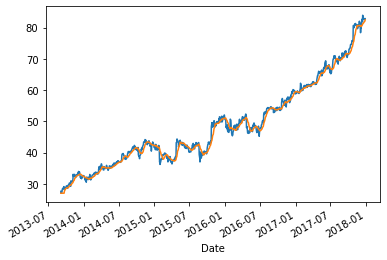

In [5]:
# print mav
print(mav[-10:])
adj_price.plot()
mav.plot()

In [96]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random
# contrived dataset
data = adj_price.values
# fit model
model = ARIMA(data, order=(1, 1, 1))
model_fit = model.fit(disp=False)
# make prediction
pred = []
#yhat = model_fit.predict(len(data), len(data), typ='levels')
yhat = model_fit.predict(1090, 1100, typ='levels')

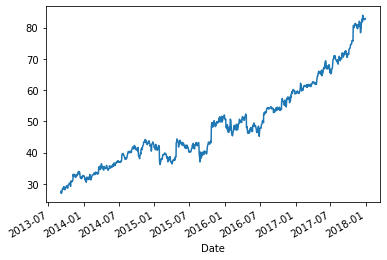

In [98]:
adj_price.plot()

In [99]:
pred = []
for i in range(len(yhat)):
    pred.append(yhat)

In [101]:
adj_price.values[1089]

82.85555057345542

In [150]:
# ARIMA example
from statsmodels.tsa.arima_model import ARIMA
from random import random

pred = []
for i in range(1,len(adj_price)):
    # contrived dataset
    data = adj_price.values[:i+30]
    # fit model
    model = ARIMA(data, order=(1, 1, 1))
    model_fit = model.fit(disp=False)
    # make prediction
    
    yhat = model_fit.predict(len(data)-30, len(data)-30, typ='levels')
    pred.append(yhat)

c:\users\binks\desktop\quantamental\quantenv\lib\site-packages\statsmodels\tsa\kalmanf\kalmanfilter.py:220: RuntimeWarning: divide by zero encountered in true_divide
  Z_mat, R_mat, T_mat)
c:\users\binks\desktop\quantamental\quantenv\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: overflow encountered in exp
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\binks\desktop\quantamental\quantenv\lib\site-packages\statsmodels\tsa\tsatools.py:689: RuntimeWarning: invalid value encountered in true_divide
  newparams = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\binks\desktop\quantamental\quantenv\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: overflow encountered in exp
  tmp = ((1-np.exp(-params))/(1+np.exp(-params))).copy()
c:\users\binks\desktop\quantamental\quantenv\lib\site-packages\statsmodels\tsa\tsatools.py:690: RuntimeWarning: invalid value encountered in true_divide
  tmp = ((1-np.exp(-params))/(1+np.exp(-pa

In [154]:
real = []
for i in range(len(adj_price)):
    real.append(adj_price[i])
#real = real[30:]

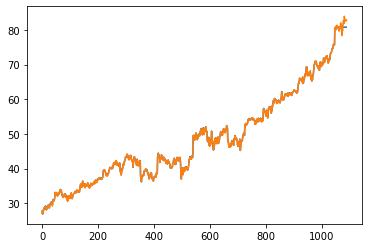

In [163]:
plt.plot(pred)
plt.plot(real)
pred.append(80)

In [164]:
mean_squared_error(pred,real) 

0.07287490708705441

In [165]:
pred[1000],real[1000]

(array([70.38157166]), 70.35913990150615)